<a href="https://www.kaggle.com/code/jamesgalliano/customer-segmentation-using-k-means-clustering?scriptVersionId=108429550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# Importing Datasets

In [2]:
customer = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")

In [3]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#Checking if there are wrong datatypes in dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Convert Dt_Customer data types from object into datetime
customer["Dt_Customer"] = pd.to_datetime(customer["Dt_Customer"])

In [6]:
#Checking fix data types
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Checking Missing Values

In [7]:
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 missing data in income column, lets fill the missing data with mean of income value.

In [8]:
#Fill the missing value in income column
customer['Income'] = customer['Income'].fillna(customer['Income'].mean())

In [9]:
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Now we're finished clean the dataset. Lets make new columns that contain age of the customer so it will be easier for us to do exploratory data analysis and create algorithm for customer segmenting

In [11]:
#Create new column that contains age of each customer
customer['Age'] = 2022-customer['Year_Birth']

In [12]:
#Checking dataset with new column
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41


Now we're succesfully created age column, now lets take a look at customer profile

# **Customers Profile**

In [13]:
px.histogram(customer, x='Age', title = 'Distribution of Customer by Age')

In [14]:
px.box(customer, y = 'Age')

Boxplot above shows that there are huge outlier on age boxplot, we should drop it later. We can divide age of customer into 4 category : Young, Adult, Mature, and Senior category

In [15]:
#Remove outlier on age column
customer = customer.drop(customer[customer.Age>85].index)

In [16]:
#Divide age of customer into 4 category
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
customer['Age_group'] = pd.cut(customer['Age'], bins=cut_bins, labels=cut_labels_Age)

In [17]:
px.pie(customer, names = 'Age_group', title = 'Distribution of Customer by Age Group')

Now we know that all of the customer is consist by 54.1% of customers falls into mature category, 25.8% of customers falls into adult category, 18.8% of customers falls into senior category, 1.25% of customers falls into young category.

In [18]:
px.pie(customer, names = 'Education', title = 'Distribution of Customer by Education')

Based on chart above, the majority of customer is graduation or bachelor deegre followed by master and PhD deegre. We can divide the education of customer for our model into two categories, undergraduate and postgraduate

In [19]:
#divide education of customer into two categories
customer['Education']=customer['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [20]:
px.pie(customer, names = 'Education', title = 'Distribution of Customer by Education')

Now we know that all of the customer is consist by 88.5% of customer have postgraduate education and 11.5% of customer have undergraduate education

In [21]:
px.pie(customer, names = 'Marital_Status', title = 'Distribution of Customer by Marital Status')

Based on chart above, we know that there are many marital status with absurd and YOLO being one of the marital status of the customers (I guess i'll put myself into absurd or YOLO marital status). Lets divide it into two categories, single and in-relationship.

In [22]:
#divide the marital status of each customer into two category
customer['Marital_Status']=customer['Marital_Status'].replace({'Divorced':'Single','Single':'Single','Married':'In-Relationship','Together':'In-Relationship','Absurd':'Single','Widow':'Single','YOLO':'Single','Alone':'Single'})

In [23]:
px.pie(customer, names = 'Marital_Status', title = 'Distribution of Customer by Marital Status')

After we divide the marital status into two categories, now we know that all of the customer is consist by 64.5% of customer in relationship and 35.5% of customer are single.

In [24]:
px.histogram(customer, x = 'Income', title = 'Distribution of Customer by Income')

In [25]:
px.box(customer, y = 'Income')

The plot above shows there are huge outlier in income boxplot with income on 666.666k ,we should remove it later. We can divide the income of each customers into 4 category : low income, low to medium income, medium to high income, and high income. 

In [26]:
#Remove outlier on customer income
customer = customer.drop(customer[customer.Income>600000].index)

In [27]:
#divide the income of each customer into 4 categories
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
customer['Income_group'] = pd.qcut(customer['Income'], q=4, labels=cut_labels_Income)

In [28]:
px.pie(customer, names = 'Income_group', title = 'Distribution of Customer by Income Group')

Its interesting that income group of each customer is distributed evenly.

In [29]:
px.histogram(customer, x = 'Kidhome', title = 'Distribution of Customer by Kids in Their Home')

In [30]:
px.histogram(customer, x = 'Teenhome', title = 'Distribution of Customer by Teens in Their Home')

Now lets combine Kidhome and Teenhome into one column. We call it 'Number of Child' column, this column contain info of the child in customer household.

In [31]:
#Create Number of Child Column
customer['Number_of_Child']=customer['Kidhome']+customer['Teenhome']

In [32]:
px.histogram(customer, x = 'Number_of_Child', title = 'Distribution of Customer by Number of Children')

Now we know that majority of the customers have 1 children followed by 0 children and 2 children.

In [33]:
px.pie(customer, names = 'Complain', title = 'Distribution of Customer by Complain')

Pie chart above shows that 99.1% of customers never filed a complain while 0.938% of customers have filed a complain

We already take a look into our customer profile, now lets create new columns that contain information of total monthly spend,total number of campaign accepted, and total purchases

In [34]:
#Create total monthly spend column
customer['total_spend']=customer['MntWines']+customer['MntFruits']+customer['MntMeatProducts']+customer['MntFishProducts']+customer['MntSweetProducts']+customer['MntGoldProds']

In [35]:
#Create total number of accepted campaign column
customer['total_campain_acc']=customer['AcceptedCmp1']+customer['AcceptedCmp2']+customer['AcceptedCmp3']+customer['AcceptedCmp4']+customer['AcceptedCmp5']+customer['Response']

In [36]:
#Create total purchases
customer['total_purchases']=customer['NumWebPurchases']+customer['NumStorePurchases']+customer['NumCatalogPurchases']

# **Data Pre-Processing**

In [37]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Age_group,Income_group,Number_of_Child,total_spend,total_campain_acc,total_purchases
0,5524,1957,Postgraduate,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,65,Mature,Medium to high income,0,1617,1,22
1,2174,1954,Postgraduate,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,68,Senior,Low to medium income,2,27,0,4
2,4141,1965,Postgraduate,In-Relationship,71613.0,0,0,2013-08-21,26,426,...,3,11,0,57,Mature,High income,0,776,0,20
3,6182,1984,Postgraduate,In-Relationship,26646.0,1,0,2014-10-02,26,11,...,3,11,0,38,Adult,Low income,1,53,0,6
4,5324,1981,Postgraduate,In-Relationship,58293.0,1,0,2014-01-19,94,173,...,3,11,0,41,Adult,Medium to high income,1,422,0,14


In [38]:
#Checking all of the columns in customer dataset
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_group', 'Income_group', 'Number_of_Child', 'total_spend',
       'total_campain_acc', 'total_purchases'],
      dtype='object')

In [39]:
#Create new data for our model and dropping feature
model = customer.copy()
model.drop(
    ['Dt_Customer','Kidhome', 'Teenhome', 'Recency', 'ID', 'Year_Birth','Income',''
     'Age','Z_CostContact', 'Z_Revenue'
    ], axis=1, inplace=True)

In [40]:
model.head()

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_group,Income_group,Number_of_Child,total_spend,total_campain_acc,total_purchases
0,Postgraduate,Single,635,88,546,172,88,88,3,8,...,0,0,0,1,Mature,Medium to high income,0,1617,1,22
1,Postgraduate,Single,11,1,6,2,1,6,2,1,...,0,0,0,0,Senior,Low to medium income,2,27,0,4
2,Postgraduate,In-Relationship,426,49,127,111,21,42,1,8,...,0,0,0,0,Mature,High income,0,776,0,20
3,Postgraduate,In-Relationship,11,4,20,10,3,5,2,2,...,0,0,0,0,Adult,Low income,1,53,0,6
4,Postgraduate,In-Relationship,173,43,118,46,27,15,5,5,...,0,0,0,0,Adult,Medium to high income,1,422,0,14


# **Data Encoding**

There are categorical data on model data, now we will do ordinal encoding to the categorical data. 

In [41]:
#encoding age group feature
model['Age_group'] = model['Age_group'].replace({'Young': 1, 'Adult': 2 , 'Mature': 3, 'Senior': 4}).astype(int)

#encoding Education feature
model['Education'] = model['Education'].replace({'Undergraduate': 1, 'Postgraduate': 2}).astype(int)

#converting relation feature into int type
model['Marital_Status'] = model['Marital_Status'].replace({'Single': 1, 'In-Relationship': 2}).astype(int)

#encoding income group feature
model['Income_group'] = model['Income_group'].replace({'Low income': 1, 'Low to medium income': 2, 'Medium to high income': 3, 'High income': 4}).astype(int)

In [42]:
model.head()

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_group,Income_group,Number_of_Child,total_spend,total_campain_acc,total_purchases
0,2,1,635,88,546,172,88,88,3,8,...,0,0,0,1,3,3,0,1617,1,22
1,2,1,11,1,6,2,1,6,2,1,...,0,0,0,0,4,2,2,27,0,4
2,2,2,426,49,127,111,21,42,1,8,...,0,0,0,0,3,4,0,776,0,20
3,2,2,11,4,20,10,3,5,2,2,...,0,0,0,0,2,1,1,53,0,6
4,2,2,173,43,118,46,27,15,5,5,...,0,0,0,0,2,3,1,422,0,14


We succesfully to ordinal encode all the categorical data, now lets do normalization using power transformers. We doing normalization to make sure that the various feature have similiar value ranges

# **Data Normalization**

In [43]:
transformer = PowerTransformer()
transformer.fit(model)
scaled_model = pd.DataFrame(transformer.transform(model), columns=model.columns)

In [44]:
scaled_model.head()

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_group,Income_group,Number_of_Child,total_spend,total_campain_acc,total_purchases
0,0.35878,-1.347635,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,0.744158,1.328316,...,-0.262362,-0.116616,-0.095001,2.386338,0.125014,0.485488,-1.376723,1.315785,1.555799,1.221160
1,0.35878,-1.347635,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,0.158137,-1.359951,...,-0.262362,-0.116616,-0.095001,-0.419052,1.588846,-0.397797,1.313796,-1.442462,-0.610311,-1.302994
2,0.35878,0.742041,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,-0.820155,1.328316,...,-0.262362,-0.116616,-0.095001,-0.419052,0.125014,1.298208,-1.376723,0.660253,-0.610311,1.024810
3,0.35878,0.742041,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,0.158137,-0.709381,...,-0.262362,-0.116616,-0.095001,-0.419052,-1.290604,-1.385899,0.182645,-1.118746,-0.610311,-0.868240
4,0.35878,0.742041,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,1.442609,0.526159,...,-0.262362,-0.116616,-0.095001,-0.419052,-1.290604,0.485488,0.182645,0.177763,-0.610311,0.356423


# **Clustering**

Before we cluster our data, we should find out ideal cluster for us using Elbow Method and silhouette score for validation

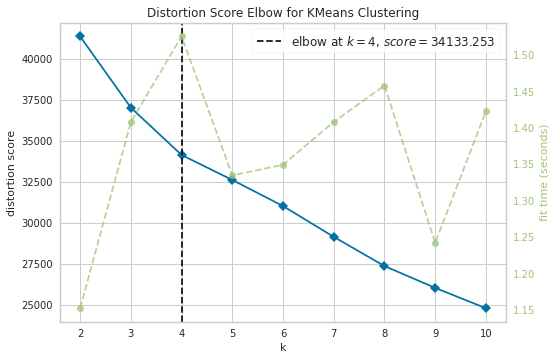

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(scaled_model)
elbow_graph.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



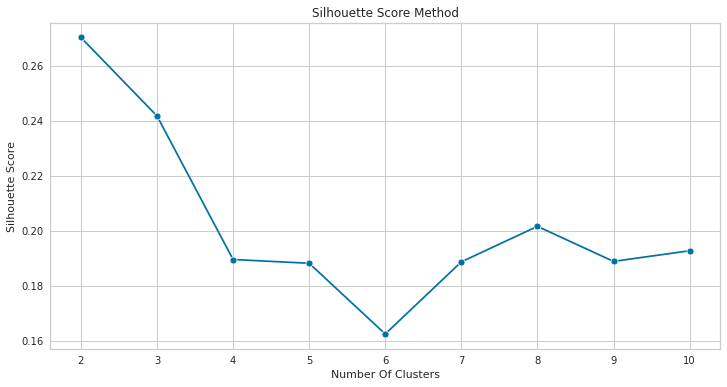

In [46]:
clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
s_scores = [] # silhouette scores

for n in clusters:
    kmeans = KMeans(n_clusters = n, random_state=43).fit(scaled_model)
    silhouette = silhouette_score(scaled_model, kmeans.labels_)
    s_scores.append(silhouette)

plt.figure(figsize=(12,6))
sns.lineplot(clusters, s_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1, each clusters are well apart from each other and clearly distinguished if silhouette score is towards 1. We have bad silhouette score because our silhouette score is towards 0.

# **Clustering**

Explained Variance Ratio For n_components=1 is 36.77066731016674


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



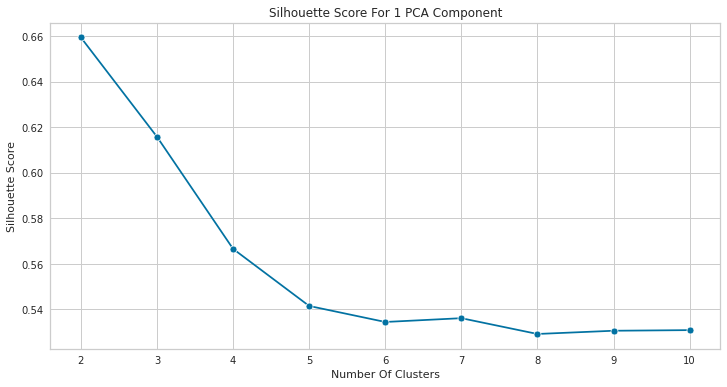

Explained Variance Ratio For n_components=2 is 46.4265030198727


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



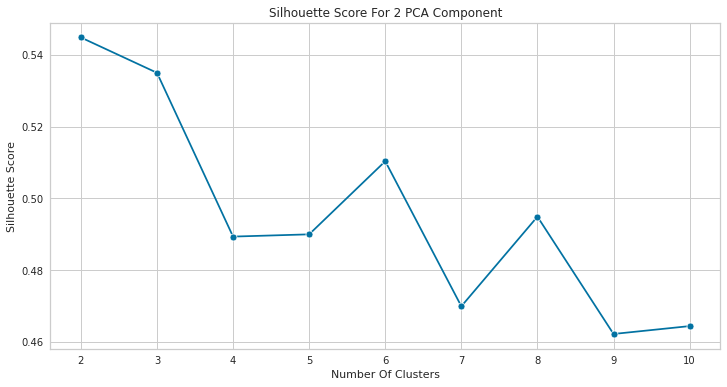

Explained Variance Ratio For n_components=3 is 54.425318737383854


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



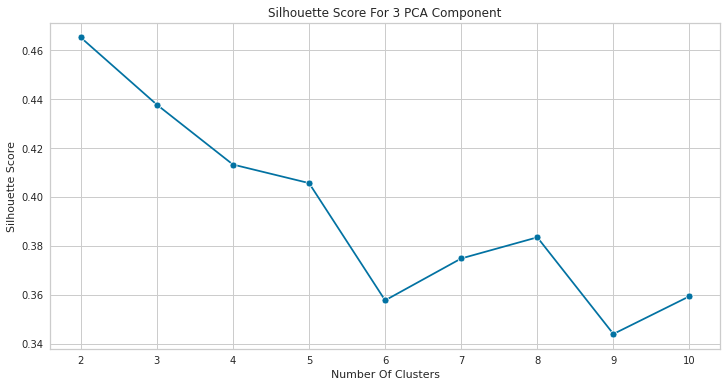

Explained Variance Ratio For n_components=4 is 60.09845632928794


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



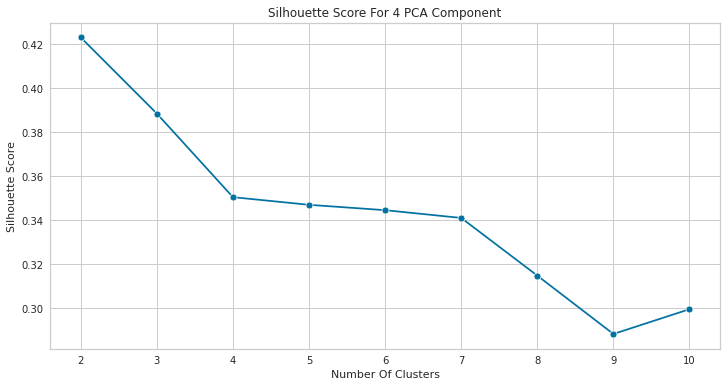

Explained Variance Ratio For n_components=5 is 64.51636276293998


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



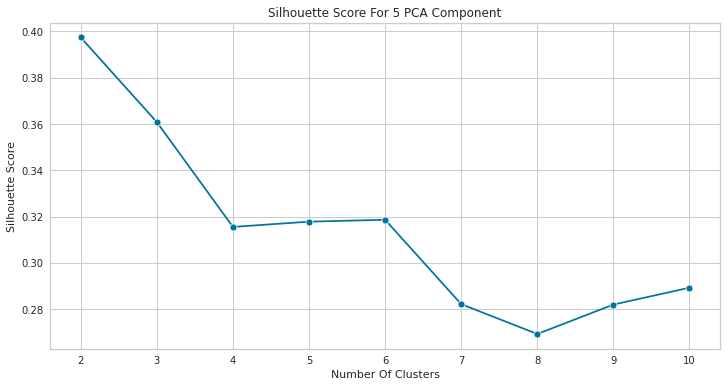

Explained Variance Ratio For n_components=6 is 68.41665828451836


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



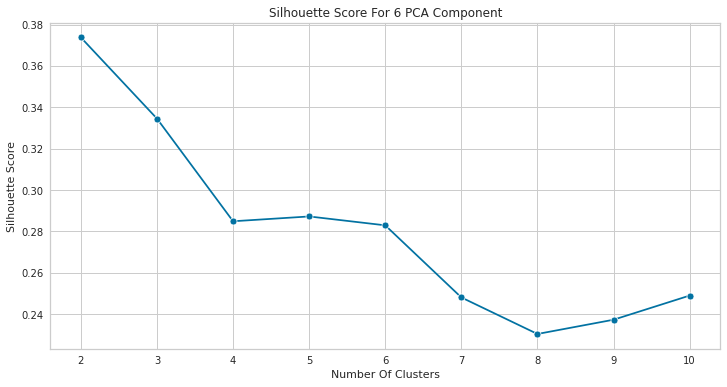

Explained Variance Ratio For n_components=7 is 72.2580705136263


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



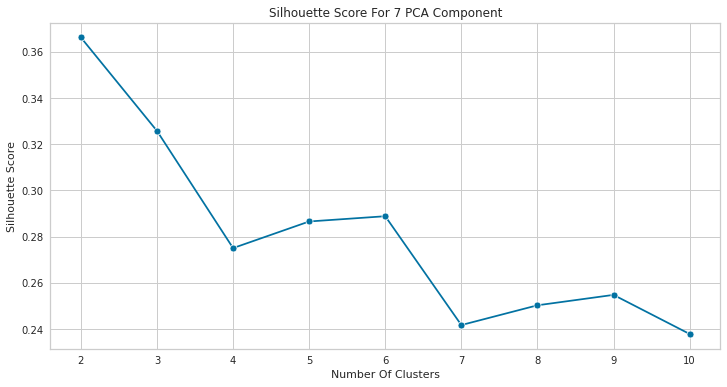

Explained Variance Ratio For n_components=8 is 75.54158195292642


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



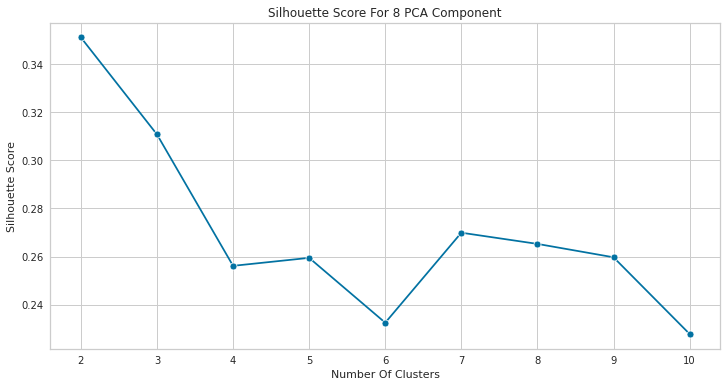

In [47]:
# block of code to findout for how many n_components we are getting best silhouette score

components = [1,2,3,4,5,6,7,8]

for n in components:
    pca = PCA(n_components = n, random_state=43)
    pca.fit(scaled_model)
    pca_model = pca.transform(scaled_model)
    print('Explained Variance Ratio For n_components={} is {}'.format(n,pca.explained_variance_ratio_.sum() * 100))
    
    clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
    s_scores = [] # silhouette scores
    for k in clusters:
        kmeans = KMeans(n_clusters = k, random_state=43).fit(pca_model)
        silhouette = silhouette_score(pca_model, kmeans.labels_)
        s_scores.append(silhouette)

    plt.figure(figsize=(12,6))
    sns.lineplot(clusters, s_scores, marker='o')
    plt.title('Silhouette Score For {} PCA Component'.format(n))
    plt.xlabel('Number Of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

In [48]:
pca = PCA(n_components=7, random_state=43)
pca.fit(scaled_model)

pca_model = pd.DataFrame(pca.transform(scaled_model), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

# **K Means Clustering**

In [49]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer['Clusters'] = kmeans.fit_predict(pca_model)

# **Cluster Explanation**

Text(0.5, 1.0, 'Distribution of Customer by Cluster')

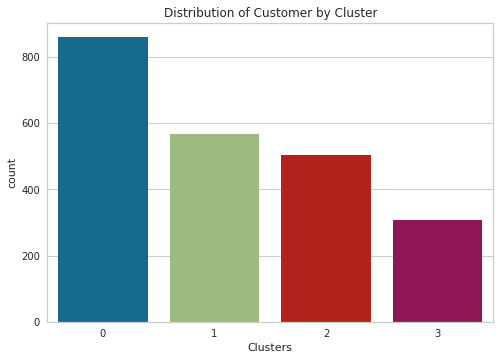

In [50]:
sns.countplot(x='Clusters', data = customer)
plt.title("Distribution of Customer by Cluster")

* The majority of customers are belong to the cluster 0
* The number of customers in cluster 1 and cluster 2 is almost the same
* Cluster 3 is the cluster with the least number of customers


Text(0.5, 1.0, 'Distribution of Customer by Income Group')

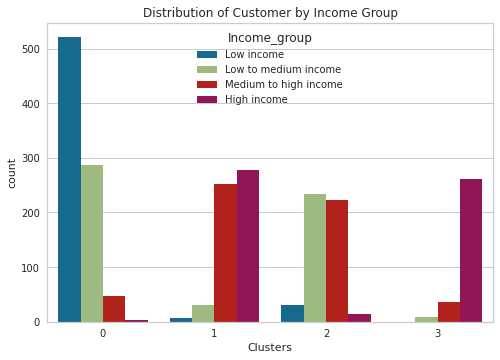

In [51]:
sns.countplot(x='Clusters', data = customer, hue = 'Income_group')
plt.title("Distribution of Customer by Income Group")

* Cluster 0 is largely consist of customers with low income followed by customers with low to medium income with very few of customers with medium to high and high income.
* Cluster 1 is largely consist of customers with high income and followed by customers with medium to high income with very few of customers with low income and low to medium income.
* Cluster 2 is largely consist of customers with low to medium income followed by customers with medium to high income with very few customers with low income and high income
* Cluster 3 is largely consist of customers with high income with very few customers with medium to high income and low to medium income. Cluster 3 don't have any customers with low income

Text(0.5, 1.0, 'Distribution of Customer by Age Group')

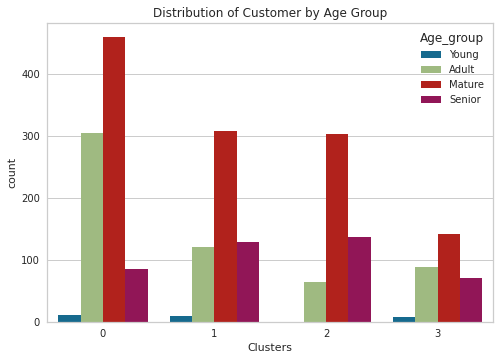

In [52]:
sns.countplot(x='Clusters', data = customer, hue = 'Age_group')
plt.title("Distribution of Customer by Age Group")

* Cluster 0 is largely consist of customer in mature age group followed by customer in adult age group. Cluster 0 have few customer in senior age group and very few customer in young age group.
* Cluster 1 is largely consist of customer in mature age group. The number of customers in adult and senior group is almost the same and have very few of customers in young age group
* Cluster 2 is largely consist of customers in mature age group followed by customers in senior age group with few of customers in adult age group and don't have any customers in young age group
* Cluster 3 is similiar with cluster 0 but the difference in amount of the customers in adult and senior age group is not high

<AxesSubplot:xlabel='Clusters', ylabel='count'>

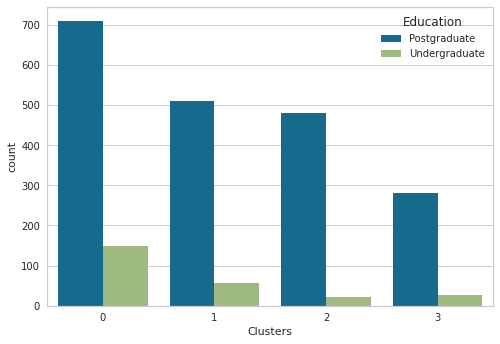

In [53]:
sns.countplot(x='Clusters', data = customer, hue = 'Education')

* All customers in each cluster have undergraduate and postgraduate deegre
* Cluster 0 is the cluster with the highest number of customers with undergraduate deegre
* Cluster 2 and cluster 3 is the cluster with lowest number of customers with undergraduate deegre

<AxesSubplot:xlabel='Clusters', ylabel='count'>

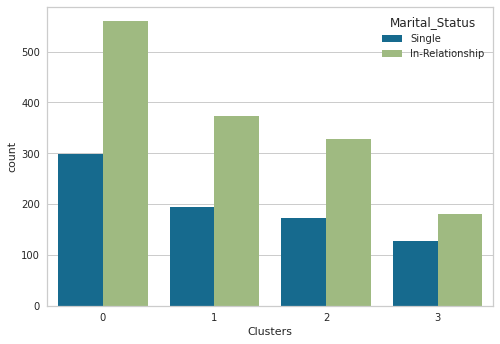

In [54]:
sns.countplot(x='Clusters', data = customer, hue = 'Marital_Status')

Text(0.5, 1.0, 'Income vs Marital Status')

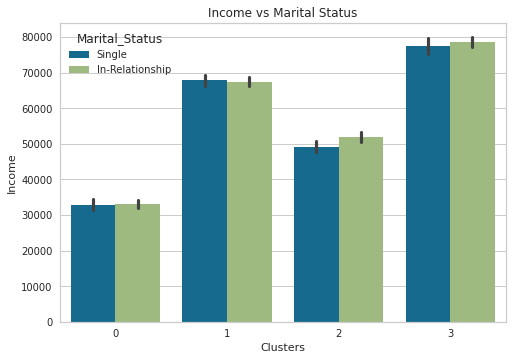

In [55]:
sns.barplot(x=customer['Clusters'], y=customer['Income'], hue = customer['Marital_Status'])
plt.title("Income vs Marital Status")

* All clusters have single customers and in-relationship customers
* The income of customers that are single and in-relationship almost the same
* The majority of customers in all clusters is in-relationship

Text(0.5, 1.0, 'Distribution of customers with number of child')

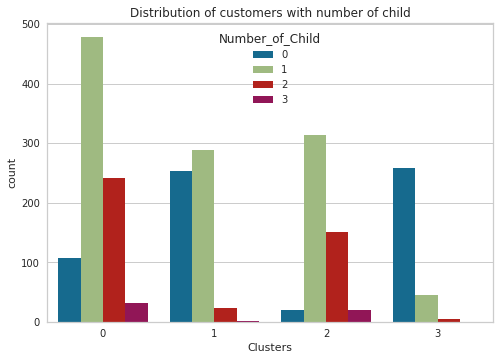

In [56]:
sns.countplot(x='Clusters', data = customer, hue = 'Number_of_Child')
plt.title("Distribution of customers with number of child")

<AxesSubplot:xlabel='Clusters', ylabel='Income'>

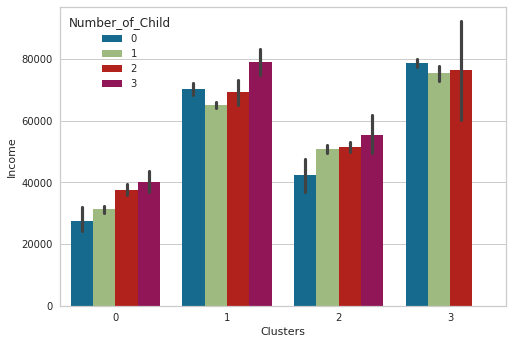

In [57]:
sns.barplot(x=customer['Clusters'], y=customer['Income'], hue=customer['Number_of_Child'])

* The majority of customers in cluster 0 have 1 child followed by 2 child and 0 child while few of the customers have 3 child
* The majority of customers in cluster 1 have 1 child followed by 0 child with few of customers have 2 child and very few of customers have 3 child
* Cluster 2 is similiar with cluster 0 but the number of customers who have 0 child and 3 child are same
* The majority of customers in cluster 3 have no kids and don't have any customers who have 3 kids

<AxesSubplot:xlabel='Clusters', ylabel='total_spend'>

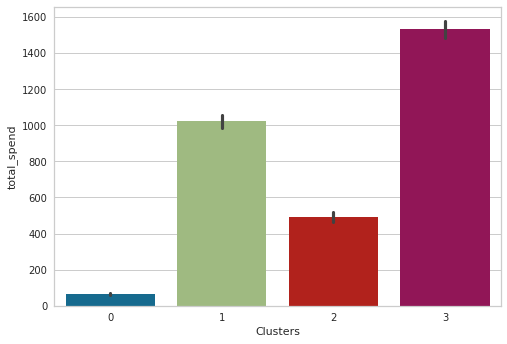

In [58]:
sns.barplot(x=customer['Clusters'], y=customer['total_spend'])

* Cluster 3 is cluster with highest number of spending
* Cluster 1 is cluster with second highest number of spending
* Cluster 0 is cluster with the lowest number of spending

<AxesSubplot:xlabel='Clusters', ylabel='total_purchases'>

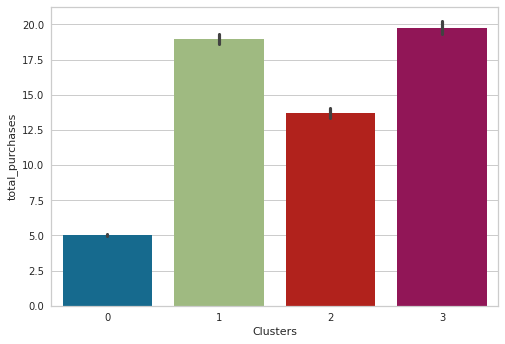

In [59]:
sns.barplot(x=customer['Clusters'], y=customer['total_purchases'])

* Cluster 3 is cluster with highest amount of total purchases
* Cluster 1 is cluster with second highest amount of total purchases
* Cluster 1 have bigger amount of total purchases than amount of spending, it means cluster 1 likes to buy cheap product
* Cluster 0 is cluster with lowest amount of total purchases

<AxesSubplot:xlabel='Clusters', ylabel='count'>

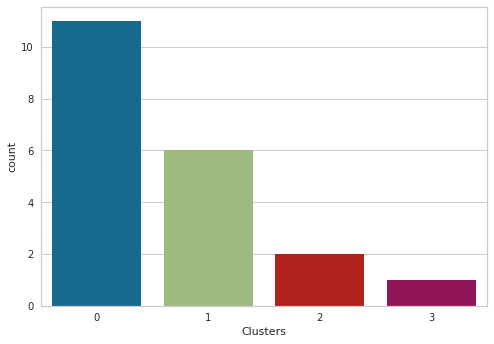

In [60]:
sns.countplot(x='Clusters', data=customer[customer['Complain']==1])

* Cluster 0 is cluster that likes to complain
* Cluster 1 is likes to complain but not often than Cluster 0
* Cluster 3 is less likely to complain

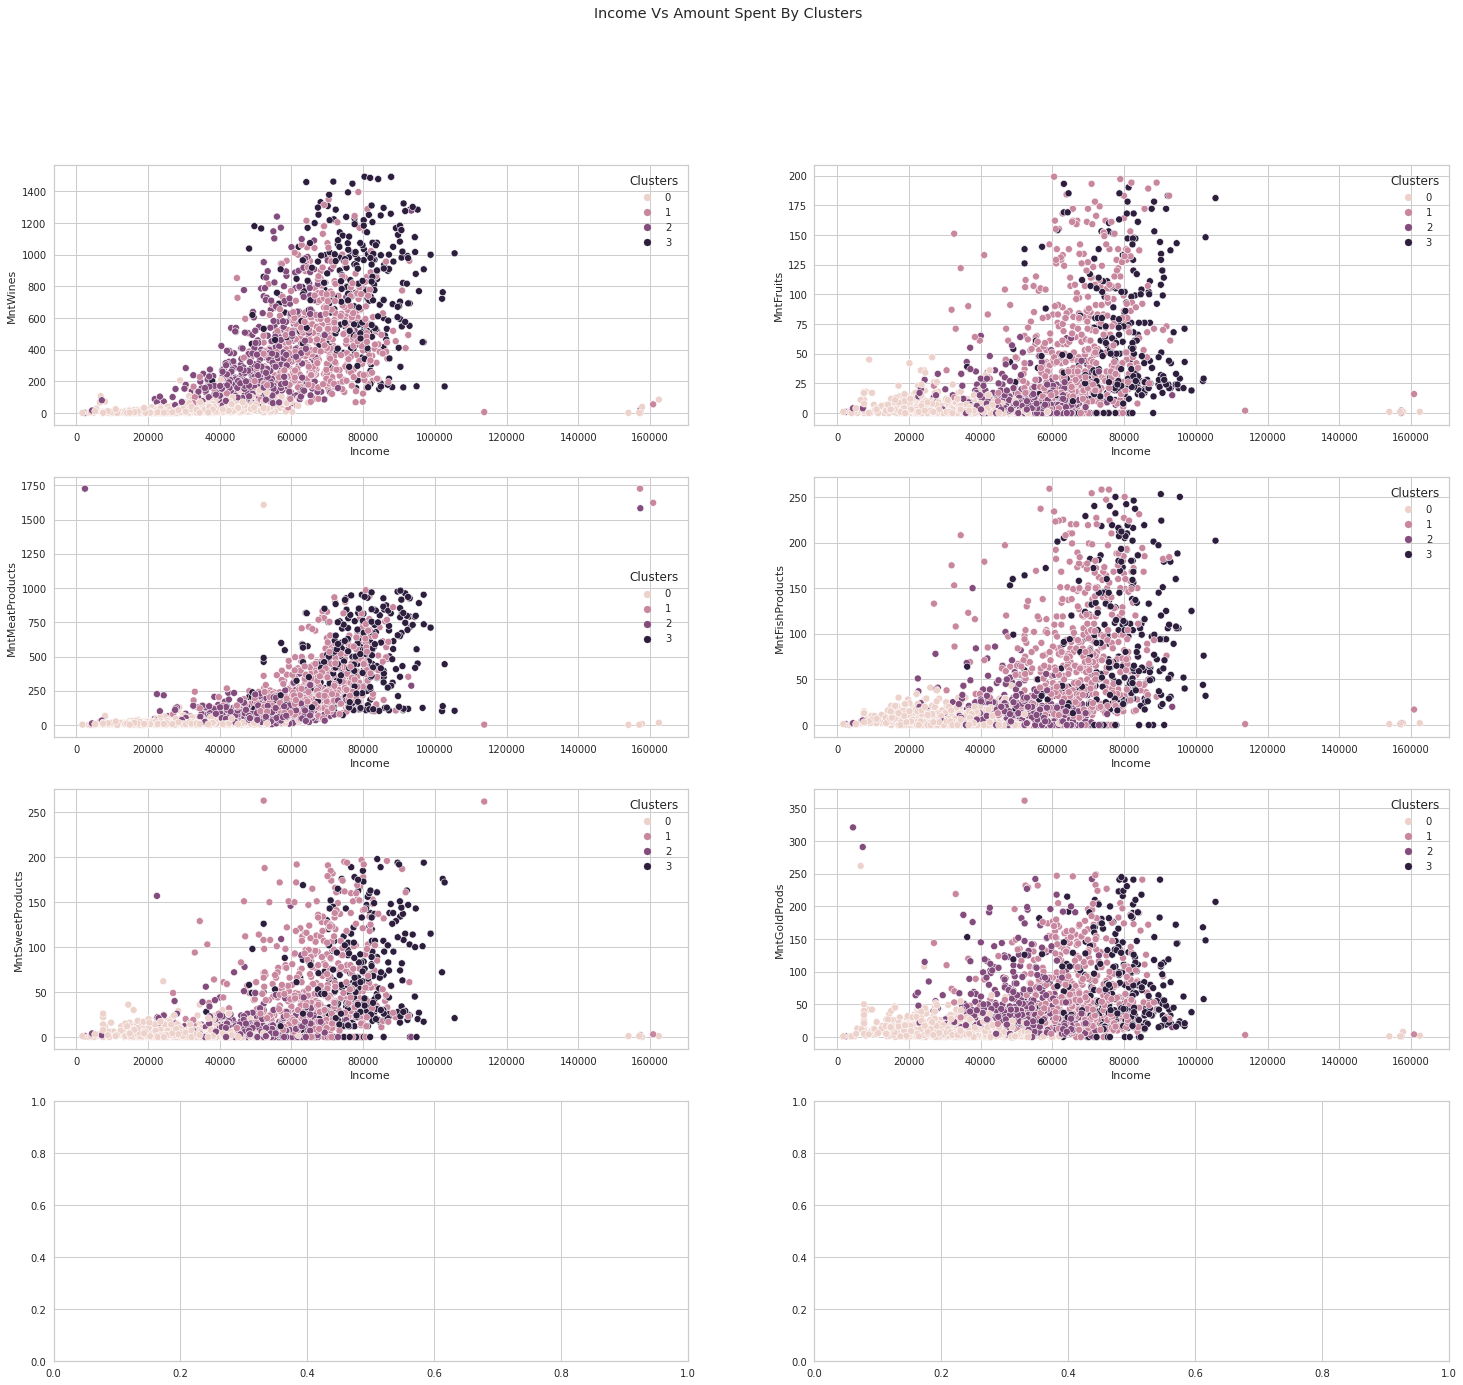

In [61]:
Products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds']

_, ax1 = plt.subplots(4,2, figsize=(25,22))
plt.suptitle('Income Vs Amount Spent By Clusters')

for i, col in enumerate(Products):
    sns.scatterplot(x='Income', y=col, data=customer, ax=ax1[i//2, i%2],hue='Clusters')
    
plt.show()

* Cluster 0 have spent less money on all of the products
* Cluster 1 have spent more money on fruits and fish products
* Cluster 2 have spent more money on wine and gold
* Cluster 3 have spent more money on all of products

<AxesSubplot:xlabel='Clusters', ylabel='NumWebPurchases'>

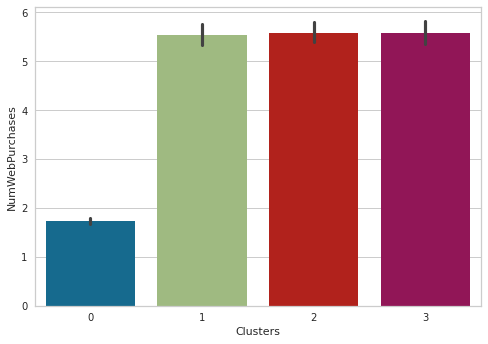

In [62]:
sns.barplot(x=customer['Clusters'], y=customer['NumWebPurchases'])

All Clusters like to buy from website except for cluster 0

<AxesSubplot:xlabel='Clusters', ylabel='NumCatalogPurchases'>

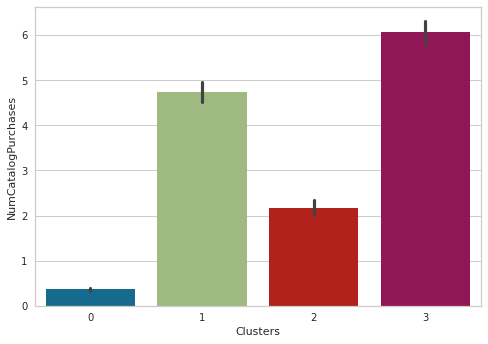

In [63]:
sns.barplot(x=customer['Clusters'], y=customer['NumCatalogPurchases'])

Cluster 3 likes to buy from catalog

<AxesSubplot:xlabel='Clusters', ylabel='NumStorePurchases'>

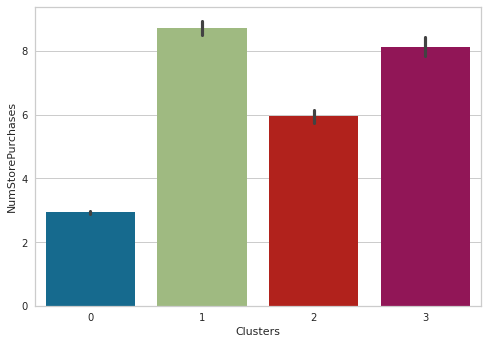

In [64]:
sns.barplot(x=customer['Clusters'], y=customer['NumStorePurchases'])

Cluster 1 likes to buy from store

<AxesSubplot:xlabel='Clusters', ylabel='NumDealsPurchases'>

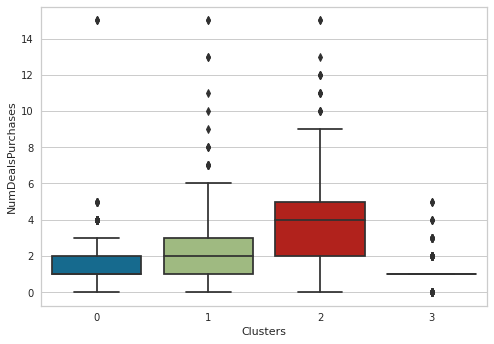

In [65]:
sns.boxplot(x=customer["Clusters"], y=customer["NumDealsPurchases"])

* Cluster 2 really likes discount
* Cluster 1 like discount
* Cluster 3 don't like discount

<AxesSubplot:xlabel='Clusters', ylabel='total_campain_acc'>

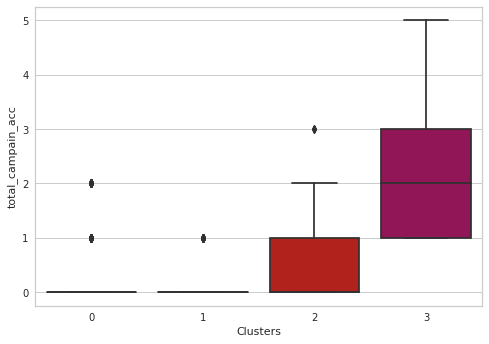

In [66]:
sns.boxplot(x=customer["Clusters"], y=customer["total_campain_acc"])

* Cluster 3 gives positive respond for marketing campaign
* Cluster 2 gives positive respond for marketing campaign
* Cluster 0 and Cluster 1 gives negative respond for marketing campaign

# **Summary**

**Cluster 0**
* Majority of customers belong to this cluster
* Have low to medium - low income
* Majority have 1 - 2 children at home
* Spend less money on product
* Buy less product
* Complains a lot
* Don't like to buy product via catalog
* Gives negatives responses on marketing campaign

**Cluster 1**
* Have medium-high to high income
* Have 0-1 children at home
* Cluster with second highest amount of total purchases 
* Spent more money on fruits and fish products
* Gives negative responses on marketing campaign
* Likes to buy product via store
* Likes discount

**Cluster 2**
* Have low-medium to medium-high income
* Consist of customers in adult to senior age group
* Have 1-2 children at home
* Spent more money on wine and gold
* Really likes discount
* Gives positives responses on marketing campaign

**Cluster 3**
* Cluster with least number of customers on it
* Have high income
* Majority are child-free
* Cluster with highest amount of total purchases
* Spent more money on all kinds of product
* Less likely to complain
* likes to buy product via catalog
* Don't likes discount
* Gives positive responses on marketing campaign